### MMDetection 설치
* 강의 영상에는 pip install mmcv-full로 mmcv를 설치(약 10분 정도의 시간이 소요)
* 실습코드는 pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html 로 변경(설치에 12초 정도 걸림). 

In [1]:
import torch
print(torch.__version__)

1.11.0+cu113


In [2]:
# https://mmcv.readthedocs.io/en/latest/get_started/installation.html 설치 과정 참조.  
#!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 46.3 MB 40 kB/s 
     |████████████████████████████████| 190 kB 16.3 MB/s 


In [3]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Cloning into 'mmdetection'...
remote: Enumerating objects: 24309, done.
remote: Total 24309 (delta 0), reused 0 (delta 0), pack-reused 24309
Receiving objects: 100% (24309/24309), 37.45 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (16969/16969), done.
running install
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mmdet
copying mmdet/__init__.py -> build/lib/mmdet
copying mmdet/version.py -> build/lib/mmdet
creating build/lib/mmdet/utils
copying mmdet/utils/ut

In [1]:
# 아래를 수행하기 전에 kernel을 restart 해야 함. 
from mmdet.apis import init_detector, inference_detector
import mmcv

### MS-COCO 데이터 기반으로 Faster RCNN Pretrained 모델을 활용하여 Inference 수행
* Faster RCNN Pretrained 모델 다운로드
* Faster RCNN용 Config 파일 설정.  
* Inference 용 모델을 생성하고, Inference 적용

In [2]:
# pretrained weight 모델을 다운로드 받기 위해서 mmdetection/checkpoints 디렉토리를 만듬. 
!cd mmdetection; mkdir checkpoints

In [3]:
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2022-04-26 05:44:44--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  8.61MB/s    in 19s     

2022-04-26 05:45:04 (8.24 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [4]:
!ls -lia /content/mmdetection/checkpoints

total 163376
4588199 drwxr-xr-x  2 root root      4096 Apr 26 05:44 .
4194928 drwxr-xr-x 19 root root      4096 Apr 26 05:44 ..
4588200 -rw-r--r--  1 root root 167287506 Nov  2 16:15 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [5]:
# config 파일을 설정하고, 다운로드 받은 pretrained 모델을 checkpoint로 설정. 
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [6]:
# config 파일과 pretrained 모델을 기반으로 Detector 모델을 생성. 
from mmdet.apis import init_detector, inference_detector

model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [7]:
# mmdetection은 상대 경로를 인자로 주면 무조건 mmdetection 디렉토리를 기준으로 함. 
# mmdetection을 현재 디렉토리로 설정
%cd mmdetection

from mmdet.apis import init_detector, inference_detector

# init_detector() 인자로 config와 checkpoint를 입력함. 
model = init_detector(config='configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py', checkpoint='checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth')

/content/mmdetection
load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [8]:
%cd /content

/content


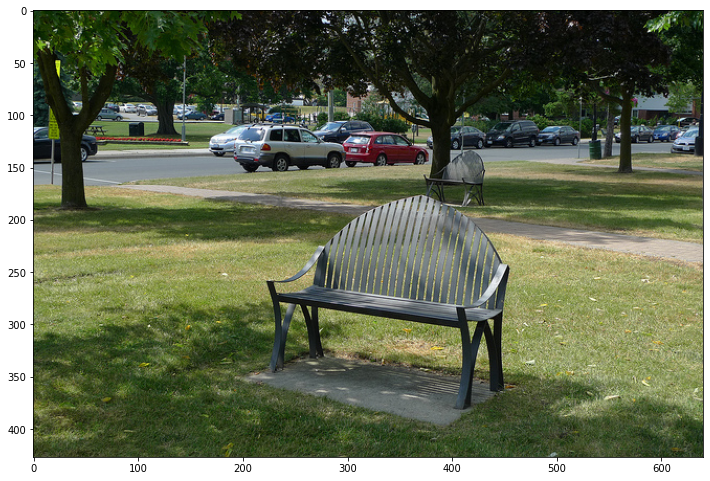

In [9]:
import cv2
import matplotlib.pyplot as plt
img = '/content/mmdetection/demo/demo.jpg'

img_arr  = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr)

In [10]:
img = '/content/mmdetection/demo/demo.jpg'
# inference_detector의 인자로 string(file경로), ndarray가 단일 또는 list형태로 입력 될 수 있음. 
results = inference_detector(model, img)

/usr/local/lib/python3.7/dist-packages/mmdet-2.23.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [11]:
type(results), len(results)
# coco data set -> len(results) = 80

(list, 80)

In [12]:
# results는 list형으로 coco class의  0부터 79까지 class_id별로 80개의 array를 가짐. 
# 개별 array들은 각 클래스별로 5개의 값(좌표값과 class별로 confidence)을 가짐. 개별 class별로 여러개의 좌표를 가지면 여러개의 array가 생성됨. 
# 좌표는 좌상단(xmin, ymin), 우하단(xmax, ymax) 기준. 
# 개별 array의 shape는 (Detection된 object들의 수, 5(좌표와 confidence)) 임

results

[array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454595e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88786465e-02],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20718279e-02]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[6.09650024e+02, 1.13805901e+02, 6.34511658e+02, 1.36951904e+02,
         9.88766015e-01],
        [4.81773712e+02, 1.10480995e+02, 5.22459717e+02, 1.30407104e+02,
         9.87157285e-01],
        [1.01820898e+00, 1.12144722e+02, 6.04374237e+01, 1.44173752e+02,
         9.83206093e-01],
        [2.94623718e+02, 1.17035233e+02, 3.78022705e+02, 1.50550873e+02,
         9.71326888e-01],
        [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
         9.67802167e-01],
        [5.90976318e+02, 1.10802658e+02, 6.15401917e+02, 1.26493553e+02,
         9.59414959e-01],
        [2.67582001e+02, 1.05686005e+02, 3.28818756

In [13]:
# ex) shape = (10,5)
# 2차원 array shape 10 = object detect한 개수, 
# 5 = xmin, ymin, xmax, ymax, class confidence score
results[0].shape, results[1].shape, results[2].shape, results[3].shape

((3, 5), (0, 5), (46, 5), (0, 5))

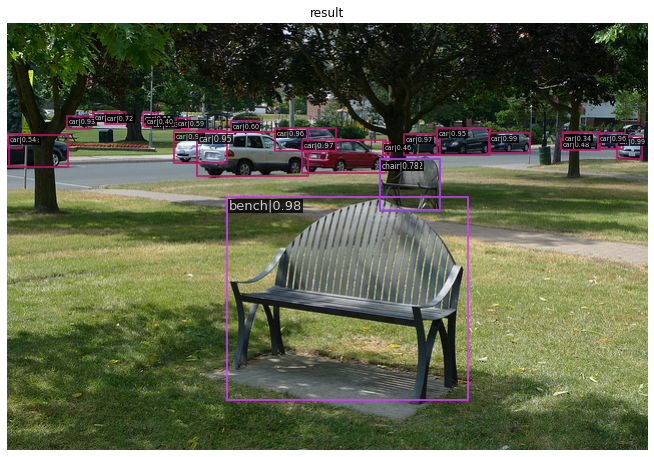

In [14]:
from mmdet.apis import show_result_pyplot
# inference 된 결과를 원본 이미지에 적용하여 새로운 image로 생성(bbox 처리된 image)
# Default로 score threshold가 0.3 이상인 Object들만 시각화 적용. show_result_pyplot은 model.show_result()를 호출. 
show_result_pyplot(model, img, results)

### Model의 Config 설정 확인하기

In [15]:
model.__dict__

{'CLASSES': ('person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'boat',
  'traffic_light',
  'fire_hydrant',
  'stop_sign',
  'parking_meter',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'sheep',
  'cow',
  'elephant',
  'bear',
  'zebra',
  'giraffe',
  'backpack',
  'umbrella',
  'handbag',
  'tie',
  'suitcase',
  'frisbee',
  'skis',
  'snowboard',
  'sports_ball',
  'kite',
  'baseball_bat',
  'baseball_glove',
  'skateboard',
  'surfboard',
  'tennis_racket',
  'bottle',
  'wine_glass',
  'cup',
  'fork',
  'knife',
  'spoon',
  'bowl',
  'banana',
  'apple',
  'sandwich',
  'orange',
  'broccoli',
  'carrot',
  'hot_dog',
  'pizza',
  'donut',
  'cake',
  'chair',
  'couch',
  'potted_plant',
  'bed',
  'dining_table',
  'toilet',
  'tv',
  'laptop',
  'mouse',
  'remote',
  'keyboard',
  'cell_phone',
  'microwave',
  'oven',
  'toaster',
  'sink',
  'refrigerator',
  'book',
  'clock',
  'vase',
  'scissors',
  'teddy_bear',


In [16]:
#print(model.cfg)
print(model.cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=None),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.

### array를 inference_detector()에 입력할 경우에는 원본 array를 BGR 형태로 입력 필요(RGB 변환은 내부에서 수행하므로 BGR로 입력 필요)

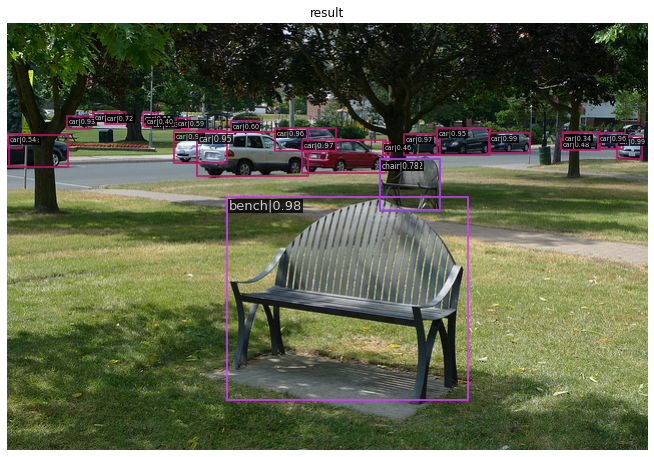

In [17]:
import cv2

# RGB가 아닌 BGR로 입력
img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
results = inference_detector(model, img_arr)

show_result_pyplot(model, img_arr, results)

### show_result_pyplot()을 이용하지 않고, inference 결과를 image로 표현하기
* model과 image array를 입력하면 해당 image를 detect하고 bbox 처리해주는 get_detected_img() 함수 생성. 
* COCO 클래스 매핑은 0 부터 순차적으로 적용됨. 
* results에 들어있는 array 값이 없는 경우는 해당 list의 index에 해당하는 class id값으로 object가 Detection되지 않은 것임.  
* 개별 class의 score threshold가 낮은 값은 제외. 

In [18]:
# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [19]:
import numpy as np

# np.where 사용법 예시.
arr1 = np.array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
         1.35454759e-01],
        [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
         8.88786465e-01],
        [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
         7.20717013e-02]], dtype=np.float32)
print(arr1.shape)

arr1_filtered = arr1[np.where(arr1[:, 4] > 0.1)]
print('### arr1_filtered:', arr1_filtered, arr1_filtered.shape)

(3, 5)
### arr1_filtered: [[3.75348572e+02 1.19171005e+02 3.81950867e+02 1.34460617e+02
  1.35454759e-01]
 [5.32362000e+02 1.09554726e+02 5.40526550e+02 1.25222633e+02
  8.88786495e-01]] (2, 5)


In [21]:
# class confidence > 0.1
np.where(arr1[:, 4] > 0.1)

(array([0, 1]),)

In [22]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list. 
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
    if len(result) == 0:
      continue
    
    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외. 
    result_filtered = result[np.where(result[:, 4] > score_threshold)]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출. 
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

car: 0.9888
car: 0.9872
car: 0.9832
car: 0.9713
car: 0.9678
car: 0.9594
car: 0.9593
car: 0.9568
car: 0.9510
car: 0.9459
car: 0.9440
car: 0.9331
car: 0.8663
car: 0.8268
car: 0.7535
car: 0.7166
car: 0.6008
car: 0.5920
car: 0.5540
car: 0.5435
car: 0.4768
car: 0.4612
car: 0.4010
car: 0.3438
bench: 0.9778
bench: 0.4170
chair: 0.7779


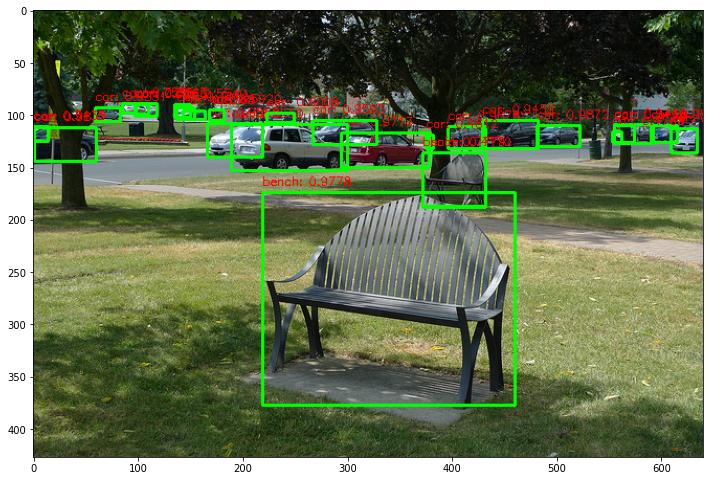

In [23]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

In [24]:
!mkdir data

In [25]:
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!ls -lia /content/data/beatles01.jpg

--2022-04-26 06:50:15--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.004s  

2022-04-26 06:50:16 (102 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

4588202 -rw-r--r-- 1 root root 383118 Apr 26 06:50 /content/data/beatles01.jpg


person: 0.9988
person: 0.9982
person: 0.9980
person: 0.9971
person: 0.9604
car: 0.9693
car: 0.9686
car: 0.9648
car: 0.9517
car: 0.9254
car: 0.9030
car: 0.8312
car: 0.8008
car: 0.7331
car: 0.6208
tie: 0.5924


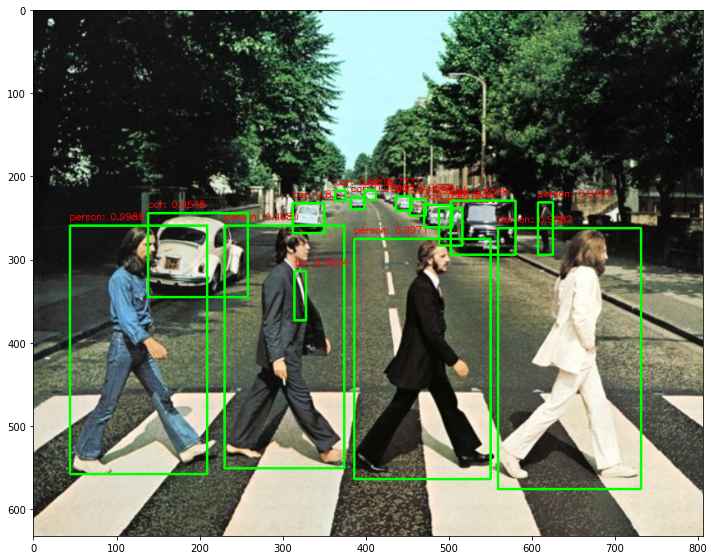

In [26]:
img_arr = cv2.imread('/content/data/beatles01.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.5, is_print=True)
# detect 입력된 이미지는 bgr임. 이를 최종 출력시 rgb로 변환 
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

### Video Inference 수행
* mmdetection의 video_demo.py 대로 Video inference 수행시 image 처리 시간이 상대적으로 오래 걸림. 
* 이미지 처리 로직을 변경하여 적용

In [27]:
!wget -O /content/data/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2022-04-26 06:53:47--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2022-04-26 06:53:47--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2022-04-26 06:53:48--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [28]:
from mmdet.apis import init_detector, inference_detector
import mmcv

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [29]:
# https://github.com/open-mmlab/mmdetection/blob/master/demo/video_demo.py 대로 video detection 수행. 

import cv2

video_reader = mmcv.VideoReader('/content/data/John_Wick_small.mp4') # = video capture
video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # writing format
video_writer = cv2.VideoWriter('/content/data/John_Wick_small_out1.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame)
  frame = model.show_result(frame, result, score_thr=0.4) # (원본 이미지, inference detect result, threshold)

  video_writer.write(frame)

if video_writer:
        video_writer.release()

[                                                  ] 0/58, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.23.0-py3.7.egg/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 3.6 task/s, elapsed: 16s, ETA:     0s


### Custom된 frame처리 로직을 적용하여 Video Inference 수행.
* 기존에 사용한 get_detected_img()를 그대로 사용함. 

In [30]:
# model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성. 
import numpy as np

# 0부터 순차적으로 클래스 매핑된 label 적용. 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  # 인자로 들어온 image_array를 복사. 
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음. 
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list. 
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화 
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐. 
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행. 
    if len(result) == 0:
      continue
    
    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외. 
    result_filtered = result[np.where(result[:, 4] > score_threshold)]
    
    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출. 
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출. 
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

In [31]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)
    btime = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold, is_print=False)
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [32]:
do_detected_video(model, '/content/data/John_Wick_small.mp4', '/content/data/John_Wick_small_out2.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 58
frame별 detection 수행 시간: 0.1615
frame별 detection 수행 시간: 0.152
frame별 detection 수행 시간: 0.1121
frame별 detection 수행 시간: 0.112
frame별 detection 수행 시간: 0.1119
frame별 detection 수행 시간: 0.1071
frame별 detection 수행 시간: 0.1092
frame별 detection 수행 시간: 0.1093
frame별 detection 수행 시간: 0.1088
frame별 detection 수행 시간: 0.1094
frame별 detection 수행 시간: 0.1108
frame별 detection 수행 시간: 0.1092
frame별 detection 수행 시간: 0.1115
frame별 detection 수행 시간: 0.109
frame별 detection 수행 시간: 0.1099
frame별 detection 수행 시간: 0.1119
frame별 detection 수행 시간: 0.1101
frame별 detection 수행 시간: 0.1096
frame별 detection 수행 시간: 0.1087
frame별 detection 수행 시간: 0.1107
frame별 detection 수행 시간: 0.1102
frame별 detection 수행 시간: 0.1141
frame별 detection 수행 시간: 0.1144
frame별 detection 수행 시간: 0.1102
frame별 detection 수행 시간: 0.1108
frame별 detection 수행 시간: 0.1104
frame별 detection 수행 시간: 0.1081
frame별 detection 수행 시간: 0.1116
frame별 detection 수행 시간: 0.109
frame별 detection 수행 시간: 0.1105
frame별 detection 수행 시간: 0.1098
frame별 detection 수행 시간: 0.11